<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
import Pkg
Pkg.add("Distributions")

    Updating registry at `C:\Users\akram\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Manifest.toml`


In [2]:
#= 
n: Total number of trials
k: Number of successful trials
p: Probability of success in one trial
=#

using Distributions
function binomial_p(n, k, p)
    pdf = @.((factorial(n)) / ((factorial(k)) * (factorial(n-k)))) * ((p^k) * ((1-p)^(n-k)))
    return (pdf)
end
    

binomial_p (generic function with 1 method)

In [3]:
binomial_p(10, 2, 0.4)

0.12093235199999997

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [4]:
#= 
n = The number of coin tosses = 10
k = The number of getting heads for winnig = 5
p = Probability of getting head in one trial = 0.4
=#

p_winning = binomial_p(10, 5, 0.4)


0.20065812480000006

The chance of losing the bet:

In [5]:
p_loosing = 1 - (p_winning)

0.7993418751999999

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [6]:
#=
If you get exactly 5 heads, you win 30 dollars. 
Otherwise you loss 10 dollars. 
=#

expected_outcome = @.(((p_winning) * (30)) + ((p_loosing) * (-10)))

-1.9736750079999963

In [7]:
#The expected value of outcome is negative, so I will lose money in the game.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [8]:
#= 
n = The number of coin tosses = 10
k = The number of getting heads for winnig = 4
p = Probability of getting head in one trial = 0.4
=#

p_winning = (binomial_p(10, 4, 0.4))

0.250822656

In [9]:
p_loosing = 1 - (p_winning) 

0.749177344

In [10]:
#=
If you get exactly 4 heads, you win 30 dollars. 
Otherwise you loss 10 dollars. 
=#

expected_outcome = @.(((p_winning) * (30)) + ((p_loosing) * (-10)))

0.03290623999999909

In [12]:
#The expected value of outcome is posetive, so I will earn money in the game.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [13]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Manifest.toml`


In [14]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [15]:
x = 0:1:10
y_true = @.(3 * x - 2)
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = @.(y_true + noise);

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [16]:
using Polynomials
line_fit = Polynomials.fit(x,y_observed,1)
fit_coeff = Polynomials.coeffs(line_fit)

2-element Vector{Float64}:
 -2.502060967463345
  3.299711030640022

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [17]:
function chisqr(b, m, x, y_observed, sigma)
   chi_sqr = @.(((y_observed - ((m * x) + b))^2)/(sigma^2))
    return (sum(chi_sqr))
end

chisqr (generic function with 1 method)

In [18]:
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

9.72772112307506

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [19]:
chi2_list = []

for i = 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise
    line_fit = Polynomials.fit(x,y_observed,1)
    fit_coeff = Polynomials.coeffs(line_fit)
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
    
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [20]:
using Statistics
chi2_mean = mean(chi2_list)

9.011073178634003

The mean value makes sense. It should be around: N-M = 11-2 = 9.
N:The number of data points
M:The number of parameters 

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [21]:
x_dist = 0:0.1:30
chi2 = di.Chisq(chi2_mean)
pdf1 = di.pdf.(chi2,x_dist)

301-element Vector{Float64}:
 0.0
 1.115479426520283e-6
 1.2050872870202312e-5
 4.7489558548209534e-5
 0.0001238399366023305
 0.0002575535814378598
 0.00046422189972411657
 0.0007580455820585833
 0.0011515253124167873
 0.001655296527138171
 0.002278062511316669
 0.003026596220782646
 0.003905790495090516
 ⋮
 0.0002632621693510565
 0.00025347351088427465
 0.00024403864344619495
 0.00023494523720921995
 0.00022618137145607583
 0.00021773552193860482
 0.0002095965485842089
 0.00020175368354244594
 0.00019419651956429596
 0.00018691499870671747
 0.00017989940135516126
 0.00017314033555678566

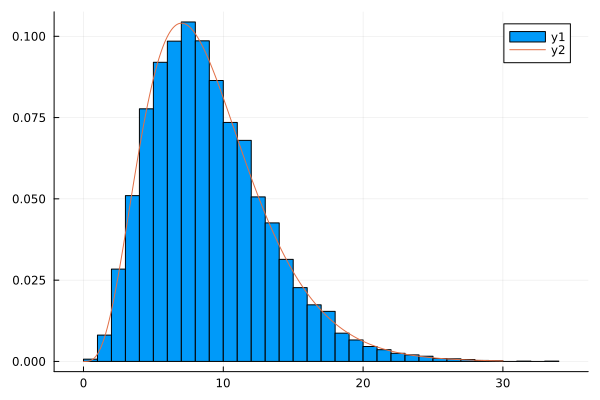

In [22]:
using Plots
Plots.histogram(chi2_list, bin=50, normalize=true)
Plots.plot!(x_dist,pdf1)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [23]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

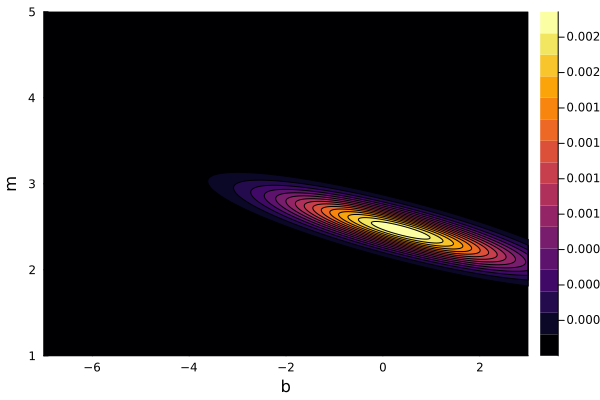

In [24]:
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

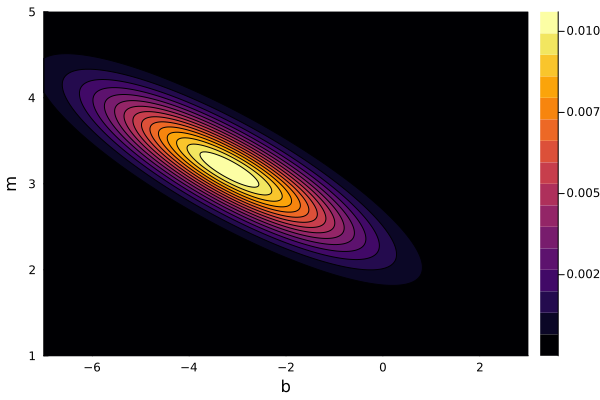

In [25]:
x = 0:0.5:5
y_true = @.(3 * x - 2)
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = @.(y_true + noise);
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

The area of the contour is increased in m dimension compared to 2.6, and the values of b are shifted. We are less sure about the actual values of m. This is because the polynomial is linear and the coefficient is m, and the smaller values of x result in smaller values of y, so y will be noisier with the same amount of sigma. 

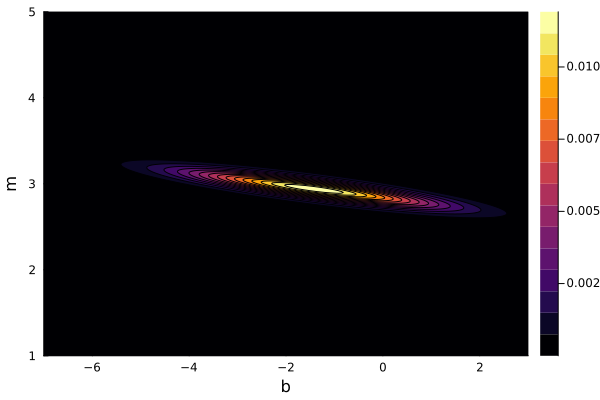

In [26]:
x = 0:2:20
y_true = @.(3 * x - 2)
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = @.(y_true + noise);
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

The area of the contour is decreased in m dimension compared to 2.6, and the values of b are shifted. We are more certain about the true values of m. This is because the polynomial is linear and the coefficient is m, and the bigger values of x result in bigger values of y, so y will be less noisy with the same amount of sigma. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

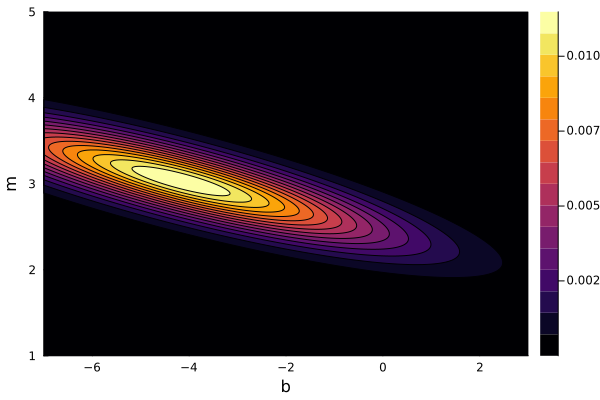

In [27]:
x = 0:1:10
y_true = @.(3 * x - 2)
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = @.(y_true + noise);
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

With increasing the sigma value, the observed data is noisier, so we will have a worse estimation of m and b, and the estimation contour has more area compared to 2.6.

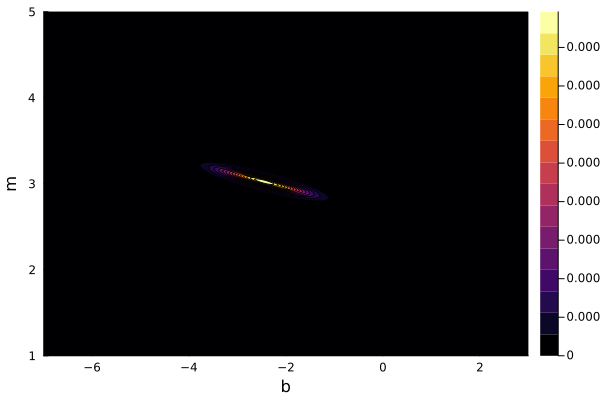

In [28]:
x = 0:1:10
y_true = @.(3 * x - 2)
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = @.(y_true + noise);
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

With reducing the sigma value, the observed data is less noisy, so we will have a better estimation of m and b, and the estimation contour has less area compared to 2.6.